In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport

from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv(r'C:\Users\hooshmand\Desktop\uni 6\artificial intelligence\project\CC GENERAL.csv')

In [4]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [6]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.drop('CUST_ID', inplace=True, axis=1)

In [10]:
df.isna().sum(axis=0)      

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
df['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isna().sum(axis=0)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [14]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [15]:
columns=list(df.columns)

for i in columns:
    upper_limit=df[i].mean()+3*df[i].std()
    lower_limit=df[i].mean()-3*df[i].std()
    df_6sigma=df[(df[i]<upper_limit)&(df[i]>lower_limit)]
df_6sigma

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8877,55.147722,0.875000,163.31,0.00,163.31,0.000000,0.875000,0.000000,0.750000,0.000,0,7,1000.0,62.619008,109.580539,0.000000,8
8878,869.328293,0.750000,0.00,0.00,0.00,1153.925205,0.000000,0.000000,0.000000,0.125,3,0,1200.0,150.755024,337.986933,0.000000,8
8879,137.744895,1.000000,441.00,0.00,441.00,0.000000,0.750000,0.000000,0.625000,0.000,0,6,1000.0,169.249683,124.639905,0.000000,8
8880,331.070135,0.750000,81.20,81.20,0.00,419.341394,0.125000,0.125000,0.000000,0.250,7,1,500.0,116.761487,205.065526,0.000000,8


In [16]:
min_max_scaler=MinMaxScaler().fit_transform(df_6sigma)
df_minmax=pd.DataFrame(min_max_scaler,columns=list(df_6sigma.columns))
df_minmax

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.0,0.000000,0.005587,0.031720,0.003978,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.2,0.032520,0.000000,0.232053,0.080892,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.033520,0.248748,0.012263,0.008210,0.000000,1.0
3,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.0,0.000000,0.002793,0.038397,0.013373,0.003204,0.000000,1.0
4,0.095038,1.000000,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.583333,0.0,0.000000,0.022346,0.058431,0.027602,0.031506,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8270,0.002896,0.875000,0.003330,0.000000,0.007258,0.000000,0.875000,0.000000,0.750000,0.0,0.000000,0.019553,0.031720,0.001234,0.001434,0.000000,0.0
8271,0.045650,0.750000,0.000000,0.000000,0.000000,0.024480,0.000000,0.000000,0.000000,0.1,0.024390,0.000000,0.038397,0.002971,0.004423,0.000000,0.0
8272,0.007233,1.000000,0.008993,0.000000,0.019600,0.000000,0.750000,0.000000,0.625000,0.0,0.000000,0.016760,0.031720,0.003336,0.001631,0.000000,0.0
8273,0.017385,0.750000,0.001656,0.001992,0.000000,0.008896,0.125000,0.125000,0.000000,0.2,0.056911,0.002793,0.015025,0.002301,0.002684,0.000000,0.0


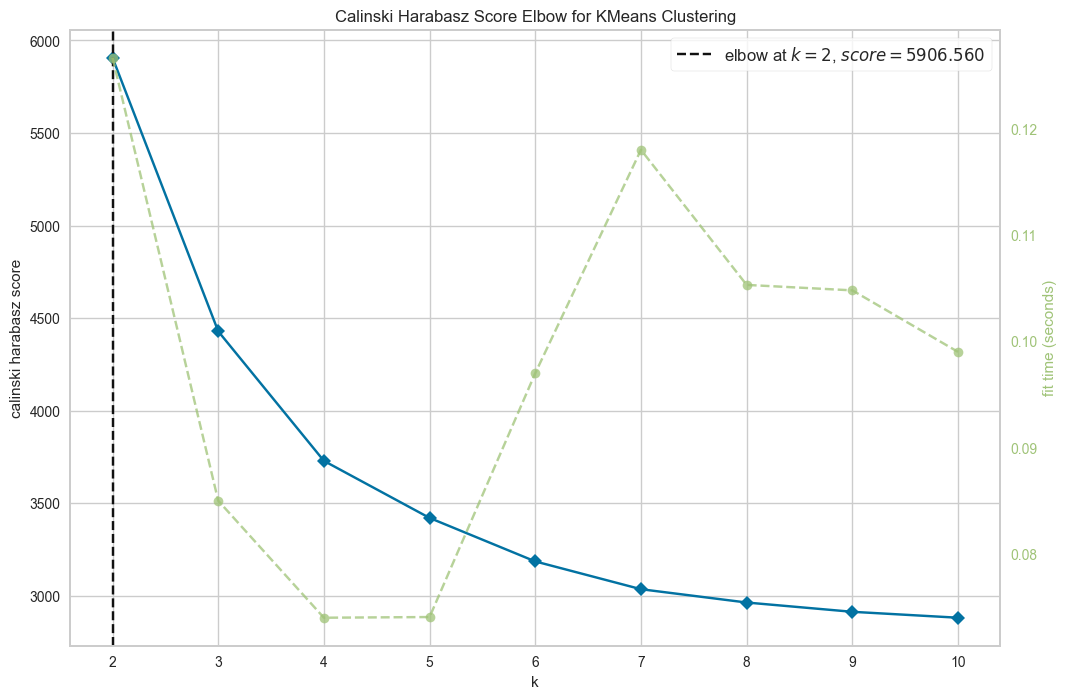

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [17]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=123), k=10,metric='calinski_harabasz')
elbow_graph.fit(df_minmax)
elbow_graph.show()


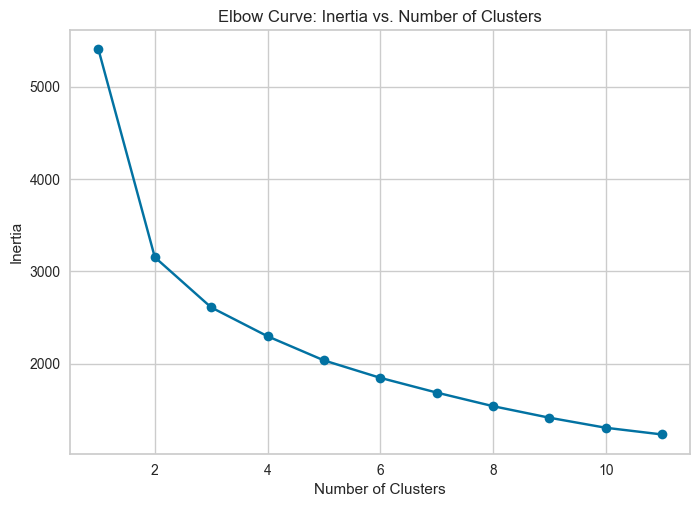

In [18]:
cluster_range = range(1, 12)
inertia = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=123)
    kmeans.fit(df_minmax)
    inertia.append(kmeans.inertia_)

plt.plot(cluster_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Curve: Inertia vs. Number of Clusters")
plt.show()

c:\Users\hooshmand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


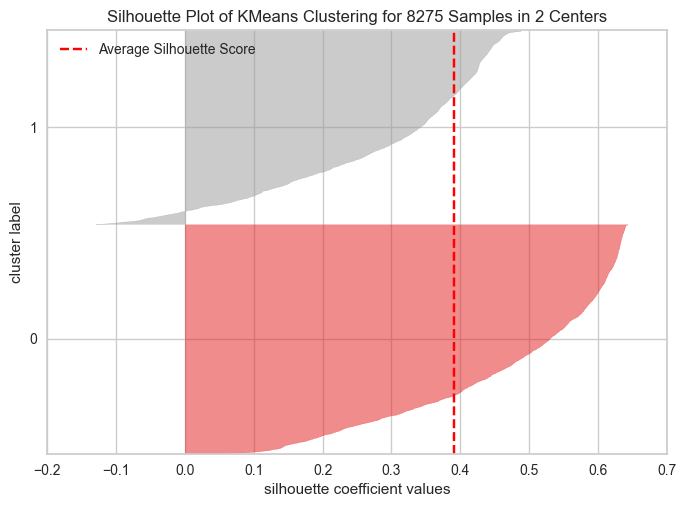

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8275 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [19]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

kmeans = KMeans(n_clusters=2, random_state=123)

kmeans.fit(df_minmax)

silhouette_visualizer = SilhouetteVisualizer(kmeans)

silhouette_visualizer.fit(df_minmax)

silhouette_visualizer.show()

c:\Users\hooshmand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


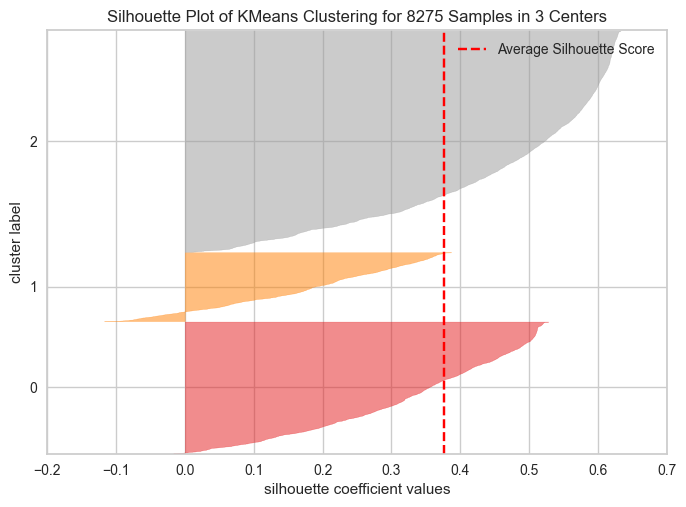

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8275 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [20]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

kmeans = KMeans(n_clusters=3, random_state=123)

kmeans.fit(df_minmax)

silhouette_visualizer = SilhouetteVisualizer(kmeans)

silhouette_visualizer.fit(df_minmax)

silhouette_visualizer.show()

c:\Users\hooshmand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


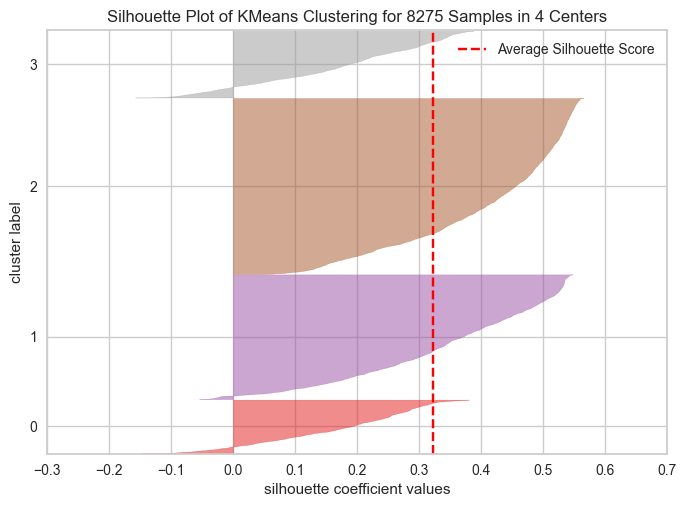

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8275 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

kmeans = KMeans(n_clusters=4, random_state=123)

kmeans.fit(df_minmax)

silhouette_visualizer = SilhouetteVisualizer(kmeans)

silhouette_visualizer.fit(df_minmax)

silhouette_visualizer.show()


c:\Users\hooshmand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


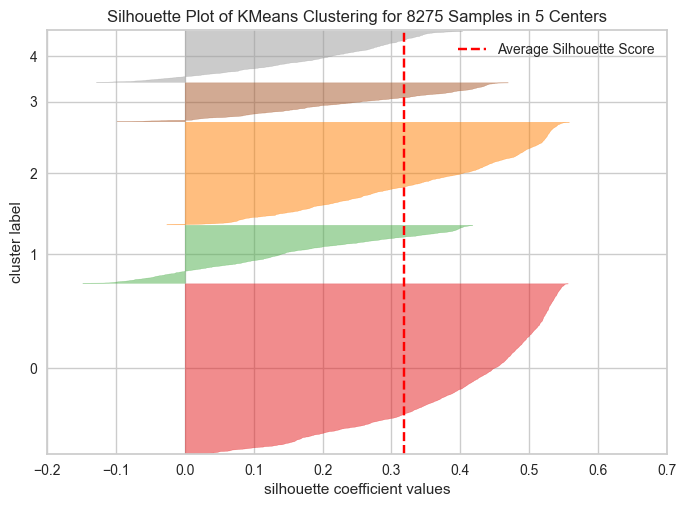

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8275 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [22]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

kmeans = KMeans(n_clusters=5, random_state=123)

kmeans.fit(df_minmax)

silhouette_visualizer = SilhouetteVisualizer(kmeans)

silhouette_visualizer.fit(df_minmax)

silhouette_visualizer.show()

In [23]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=123)

kmeans.fit(df_minmax)

silhouette_score(df_minmax,kmeans.labels_)


0.39081518091530587

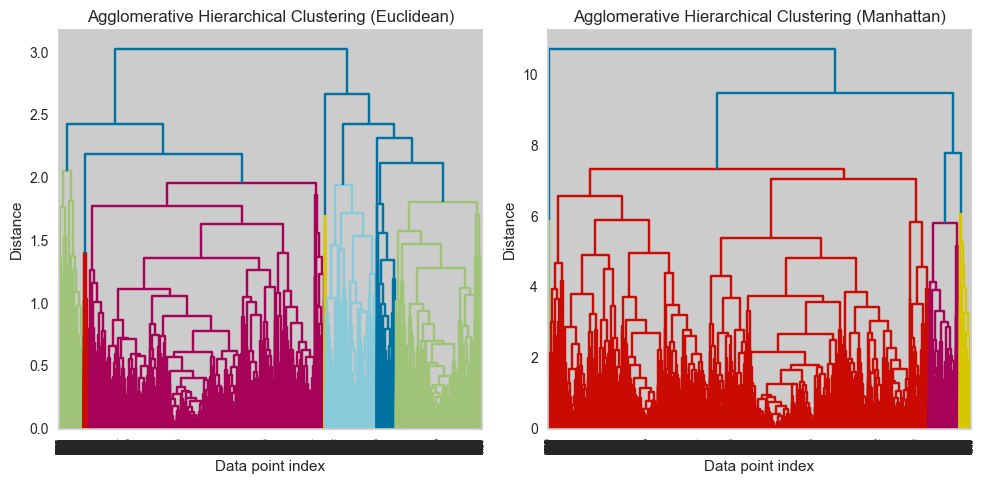

In [24]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

euclidean_distances = pdist(df_minmax, metric='euclidean')
manhattan_distances = pdist(df_minmax, metric='cityblock')

euclidean_distances_sq = squareform(euclidean_distances)
manhattan_distances_sq = squareform(manhattan_distances)

linkage_matrix_euclidean = linkage(euclidean_distances, method='complete')

linkage_matrix_manhattan = linkage(manhattan_distances, method='complete')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
dendrogram(linkage_matrix_euclidean)
plt.title('Agglomerative Hierarchical Clustering (Euclidean)')
plt.xlabel('Data point index')
plt.ylabel('Distance')

plt.subplot(1, 2, 2)
dendrogram(linkage_matrix_manhattan)
plt.title('Agglomerative Hierarchical Clustering (Manhattan)')
plt.xlabel('Data point index')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()


In [25]:
n_clusters = 2
clustering_euclidean = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='complete')
labels_euclidean = clustering_euclidean.fit_predict(df_minmax)

clustering_manhattan = AgglomerativeClustering(n_clusters=n_clusters, affinity='manhattan', linkage='complete')
labels_manhattan = clustering_manhattan.fit_predict(df_minmax)


In [26]:
silhouette_score_euclidean = silhouette_score(df_minmax, labels_euclidean)
silhouette_score_manhattan = silhouette_score(df_minmax, labels_manhattan)

print( silhouette_score_manhattan, silhouette_score_euclidean)


0.37280390396673707 0.35403817078177546


In [27]:
from sklearn.cluster import DBSCAN
score1 = []

for i in np.linspace(0.2, 0.9, 8):
    for p in range(1,10,2):
        dbscan = DBSCAN(eps=i, min_samples=p)
        label_dbscan = dbscan.fit_predict(df_minmax)
        if len(np.unique(label_dbscan))>1:
            sco = silhouette_score(df_minmax, label_dbscan)
        score1.append([len(np.unique(label_dbscan)),i,p,sco])
score1.sort(key = lambda x: x[3], reverse=True)
score1

[[2, 0.8, 7, 0.4446056725833619],
 [2, 0.8, 9, 0.4446056725833619],
 [2, 0.7, 9, 0.4268778589452841],
 [2, 0.7, 7, 0.4257833118877139],
 [2, 0.8, 3, 0.41873228666974266],
 [2, 0.8, 5, 0.41873228666974266],
 [2, 0.7, 3, 0.4026474483639055],
 [2, 0.7, 5, 0.4026474483639055],
 [2, 0.9, 3, 0.3894402139608677],
 [2, 0.9, 5, 0.3894402139608677],
 [2, 0.9, 7, 0.3894402139608677],
 [2, 0.9, 9, 0.3894402139608677],
 [2, 0.6, 3, 0.38111819610388253],
 [2, 0.6, 5, 0.37843386702792703],
 [2, 0.6, 7, 0.37843386702792703],
 [2, 0.6, 9, 0.3739539611017762],
 [2, 0.5, 3, 0.35445246131284797],
 [2, 0.5, 5, 0.3530122828557318],
 [2, 0.5, 7, 0.34979967961931674],
 [2, 0.5, 9, 0.34979967961931674],
 [2, 0.4, 9, 0.2844528316046964],
 [2, 0.4, 7, 0.2821219370239975],
 [5, 0.9, 1, 0.27800406680092693],
 [8, 0.8, 1, 0.2512302991221461],
 [4, 0.4, 3, 0.2296314080627538],
 [4, 0.4, 5, 0.2254400751634032],
 [2, 0.3, 9, 0.19750353732404413],
 [11, 0.7, 1, 0.17306089956049805],
 [4, 0.3, 7, -0.011717813880106879],

In [28]:
import plotly.graph_objects as go

x = [i[1] for i in score1]
y = [i[2] for i in score1]
z = [i[3] for i in score1]

fig = go.Figure(data=go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        color='red',
        size=5,
        line=dict(color='black', width=0.5)
    )
))

fig.update_layout(
    scene=dict(
        xaxis=dict(title='i'),
        yaxis=dict(title='p'),
        zaxis=dict(title='score'),
    ),
    title='3D Scatter Plot',
    width=700,  
    height=500  
)

fig.show()


In [29]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(2)
gm.fit(df_minmax)
label_gm = gm.predict(df_minmax)
silhouette_score(df_minmax, label_gm)

0.19659340881799145

In [30]:

n_components_range = range(2, 11)
covariance_types = ['full', 'tied', 'diag', 'spherical']

best_score = -np.inf
best_params = None

for n_components in n_components_range:
    for covariance_type in covariance_types:
        gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type)

        gmm.fit(df_minmax)

        label = gmm.predict(df_minmax)
        
        if len(np.unique(label)) > 1:
            score = silhouette_score(df_minmax, label)

        if score > best_score:
            best_score = score
            best_params = {'n_components': n_components, 'covariance_type': covariance_type}

print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_score)


Best Parameters: {'n_components': 2, 'covariance_type': 'tied'}
Best Silhouette Score: 0.3800417660909243


In [31]:
from sklearn.cluster import MeanShift
bandwidth = 0.7  
clustering = MeanShift(bandwidth=bandwidth)
clustering.fit(df_minmax)
label_ms = clustering.labels_
silhouette_score(df_minmax, label_ms)


0.2730535585699237

In [32]:
len(np.unique(label_ms))

13

In [33]:
param_grid = {'bandwidth': np.linspace(0.1, 2.0, 10)}

score_ms = []

ms = MeanShift()
best_score = -1
best_bandwidth = 0

for bandwidth in param_grid['bandwidth']:

    ms.set_params(bandwidth=bandwidth)

    ms.fit(df_minmax)

    label_ms = ms.labels_
    if len(np.unique(label_ms)) > 1:
        score = silhouette_score(df_minmax, label_ms)

    if score > best_score:
        score_ms.append([bandwidth,score])

score_ms.sort(key = lambda x: x[1], reverse=True)
score_ms



[[1.1555555555555557, 0.3756599609461106],
 [1.3666666666666667, 0.3756599609461106],
 [1.577777777777778, 0.3756599609461106],
 [1.788888888888889, 0.3756599609461106],
 [2.0, 0.3756599609461106],
 [0.7333333333333333, 0.29808414695964597],
 [0.9444444444444444, 0.2938465345996425],
 [0.5222222222222223, 0.23613823304414086],
 [0.3111111111111111, 0.16877238923124113],
 [0.1, 0.12635967481159693]]

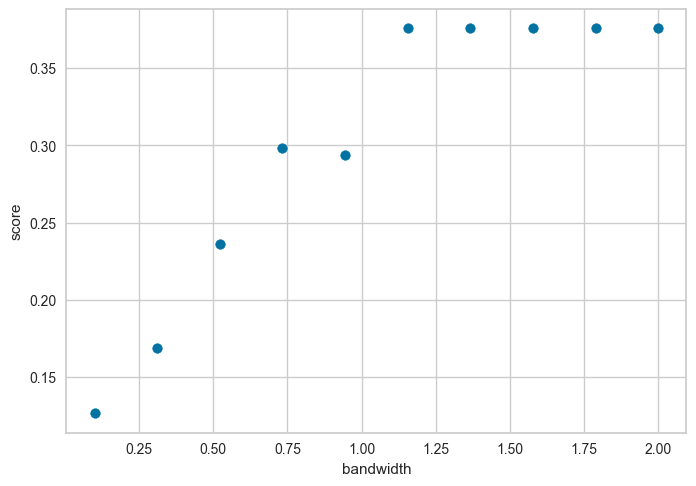

In [34]:

x = [i[0] for i in score_ms]  
y = [i[1] for i in score_ms]   

plt.scatter(x, y, c='b')  

plt.xlabel('bandwidth') 
plt.ylabel('score') 

plt.show()  

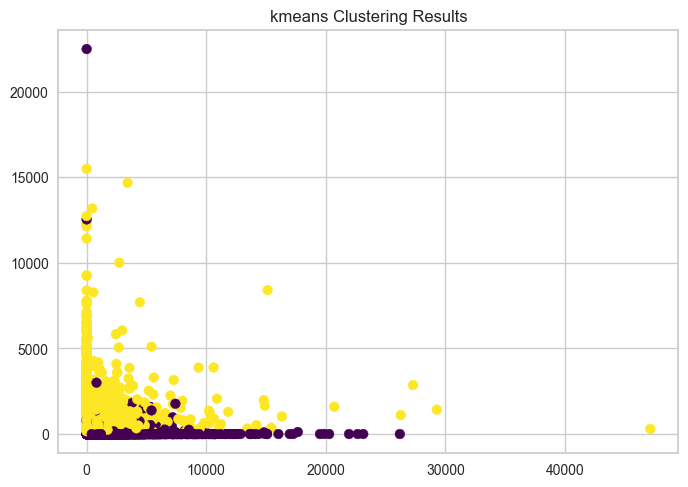

In [37]:

kmeans = KMeans(n_clusters=2, random_state=123)

kmeans.fit(df_minmax)

x1 = df_6sigma['CASH_ADVANCE']
y1 = df_6sigma['INSTALLMENTS_PURCHASES']
plt.scatter(x1,y1, c = kmeans.labels_, cmap ='viridis')
plt.title("kmeans Clustering Results")

plt.show()